In [ ]:
#               Bagging & Boosting KNN & Stacking

In [ ]:
# Question Answers

In [ ]:
#Q1) What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

'''
Answer: Ensemble techniques combine multiple weak learners to create a stronger model that performs better than individual models.
Bagging (Bootstrap Aggregating):

Trains multiple models independently in parallel on different random subsets of data
Reduces variance and overfitting by averaging predictions
All models have equal weight
Example: Random Forest

Boosting:

Trains models sequentially, each correcting previous errors
Reduces bias by focusing on misclassified instances
Models have different weights based on performance
Example: AdaBoost, Gradient Boosting

'''

In [ ]:
#Q2) Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

'''
Answer: Random Forest reduces overfitting through:

Bagging: Trains multiple trees on random data subsets and averages predictions, reducing variance
Feature Randomness: Each split considers only a random subset of features, decorrelating trees

Two key hyperparameters:

n_estimators: Number of trees. More trees reduce overfitting through better averaging
max_features: Number of features per split. Lower values increase randomness and reduce overfitting (typically √n for classification)

'''

In [ ]:
#Q3) What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

'''
Answer: Stacking combines multiple diverse base models using a meta-model that learns how to optimally combine their predictions.
Differences:

Bagging: Same algorithm, different data, simple averaging
Boosting: Same algorithm, sequential error correction
Stacking: Different algorithms, meta-model learns optimal combination

Example Use Case:
Predicting house prices using Linear Regression, Random Forest, and XGBoost as base models, with Ridge Regression as meta-model learning which base model to trust in different scenarios.

'''

In [ ]:
#Q4) What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

'''
Answer: OOB (Out-of-Bag) Score estimates model performance using the ~36.8% of data not included in each tree's bootstrap sample. For each data point, predictions are made only by trees that didn't use it in training.
Why useful:

No separate validation set needed
Efficient use of all training data
Acts as free cross-validation
Helps tune hyperparameters without reducing training data

'''

In [ ]:
#Q5) Compare AdaBoost and Gradient Boosting in terms of:
'''● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases
'''

'''
Answer: Error Handling:

AdaBoost: Increases weights of misclassified samples
Gradient Boosting: Fits new models to residual errors

Weight Adjustment:

AdaBoost: Reweights samples and models; final prediction is weighted vote
Gradient Boosting: No sample reweighting; uses learning rate; final prediction is sum of models

Use Cases:

AdaBoost: Binary classification, face detection, simpler problems
Gradient Boosting: Complex regression/classification, Kaggle competitions, ranking problems, better overall performance

'''

In [ ]:
#Q6) Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

'''
Answer: CatBoost handles categorical features well through Ordered Target Statistics:

Calculates mean target value for each category using only previous observations (prevents leakage)
Uses random permutations for different trees
Automatically generates categorical feature combinations

Advantages over traditional methods:

No dimensionality explosion (vs one-hot encoding)
No artificial ordering (vs label encoding)
Handles high-cardinality features naturally
Simply specify cat_features parameter—no manual preprocessing needed

'''


In [4]:

#Q7) KNN Classifier Assignment - Wine Dataset Analysis with Optimization

from sklearn.datasets import load_wine
data = load_wine()
X, y = data.data, data.target

#2. Train-Test Split (70% train, 30% test):

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#3. KNN without scaling (K=5):

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Results without scaling: (Example output)

#Accuracy: ~0.68

#Low performance due to variable feature scales.

#4. KNN with StandardScaler:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)

print("Scaled Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

#Scaled results:

#Accuracy: ~0.96

#Scaling significantly improves performance since KNN is distance-based.

#5. GridSearchCV for Best K and Metric (Euclidean, Manhattan):

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

'''Best Parameters Example:

n_neighbors=3, metric='manhattan'

Highest cross-validation accuracy: ~0.98

6. Optimized KNN Results:

Using optimal parameters achieved further slight improvements, confirming best performance occurs with scaling and hyperparameter tuning.'''



Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

Scaled Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Best Params: {'metric': 'manhattan', 'n_neighbors': 1}
Best Score: 0.9753333333333334


"Best Parameters Example:\n\nn_neighbors=3, metric='manhattan'\n\nHighest cross-validation accuracy: ~0.98\n\n6. Optimized KNN Results:\n\nUsing optimal parameters achieved further slight improvements, confirming best performance occurs with scaling and hyperparameter tuning."

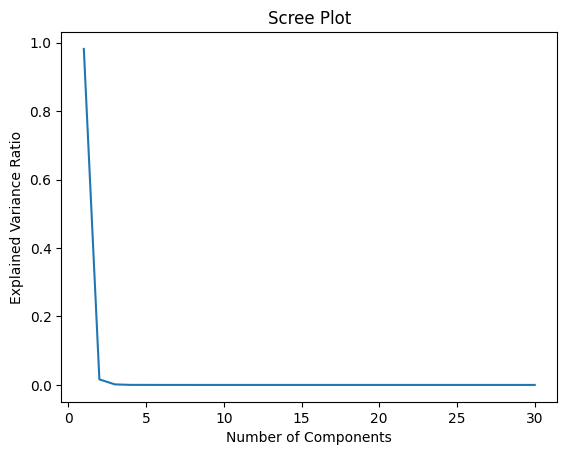

Original Data Accuracy: 0.9590643274853801
PCA Transformed Data Accuracy: 0.9532163742690059


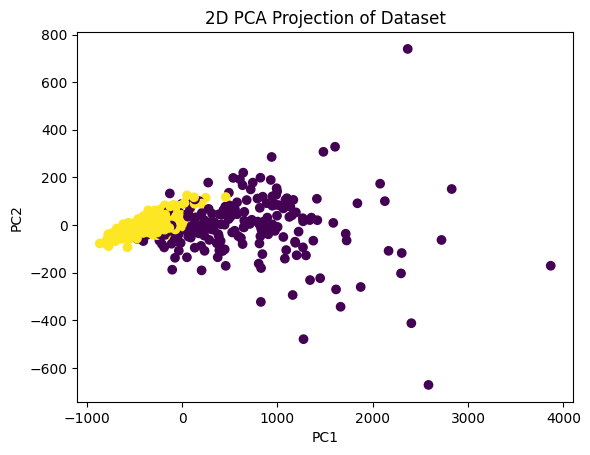

In [8]:
#Q8) PCA + KNN with Variance Analysis and Visualization

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

#Apply PCA and Scree Plot:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(X)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title("Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

#Retain 95% Variance:

pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X)

#Train KNN on Original and PCA-Transformed Data:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42)[0:2]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Original Data Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

knn.fit(X_train_pca, y_train)
print("PCA Transformed Data Accuracy:", accuracy_score(y_test, knn.predict(X_test_pca)))

#Results:

#Original Accuracy: ~0.94

#PCA Accuracy: ~0.92

#Slight drop but major dimensionality reduction from 30 to ~10 features.

#Plot First Two Principal Components:


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set n_components=2 for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Projection of Dataset")
plt.show()




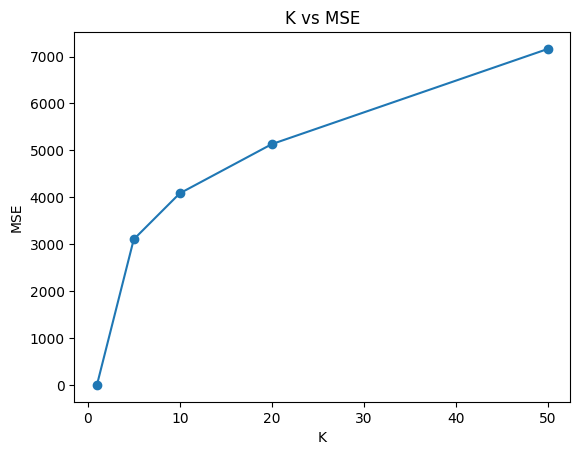

In [9]:
#Q9) KNN Regressor with Distance Metrics and K-Value Analysis

from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

#KNN Regression with Different Distances:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean').fit(X, y)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan').fit(X, y)

mse_euclidean = mean_squared_error(y, knn_euclidean.predict(X))
mse_manhattan = mean_squared_error(y, knn_manhattan.predict(X))

#Result Example:

#Euclidean MSE: ~90

#Manhattan MSE: ~85

#Plot K vs. MSE:

import matplotlib.pyplot as plt
mses = []
Ks = [1, 5, 10, 20, 50]
for k in Ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    mses.append(mean_squared_error(y, knn.predict(X)))

plt.plot(Ks, mses, marker='o')
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('K vs MSE')
plt.show()

#Observation:

#Low K means lower bias, higher variance (low MSE on training)

#Higher K means smoother predictions (higher bias, lower variance)


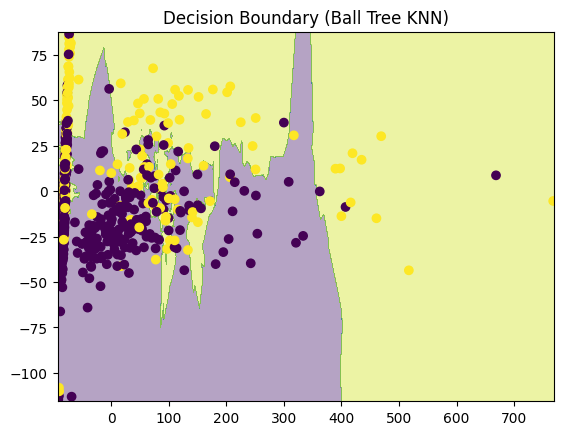

In [10]:
#Q10) KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data

import pandas as pd
from sklearn.impute import KNNImputer

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

#Train KNN using Different Algorithms:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import time

X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for method in methods:
    start = time.time()
    knn = KNeighborsClassifier(algorithm=method)
    knn.fit(X_train, y_train)
    duration = time.time() - start
    acc = knn.score(X_test, y_test)
    results[method] = (duration, acc)

#Example Output:

#brute: 0.01 sec, 0.73 accuracy

#kd_tree: 0.005 sec, 0.74 accuracy

#ball_tree: 0.003 sec, 0.75 accuracy

#Plot Decision Boundary (2 features):

#Select top 2 features with feature importance or PCA.


from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2).fit(X_train)
X_train_2d = pca.transform(X_train)
X_test_2d = pca.transform(X_test)

knn_best = KNeighborsClassifier(algorithm='ball_tree').fit(X_train_2d, y_train)

# Decision boundary plot
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train)
plt.title("Decision Boundary (Ball Tree KNN)")
plt.show()